# US Politics This Week Ad Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#CONSTANTS
TEST_DATA_FILE = 'test_data.csv'
VIEWER_DATA_FILE = 'viewer_data.csv'
VIEWER_ID = 'viewer_id'
SAW_LOCAL_AD = 'test'
WATCHED_POLITICS = 'watched'

# 1. Read Test dataset and display columns

In [3]:
viewer_data = pd.read_csv(VIEWER_DATA_FILE)
test_data = pd.read_csv(TEST_DATA_FILE)
print(len(test_data))
test_data.head()

418026


,viewer_id,date,tv_make,tv_size,uhd_capable,tv_provider,total_time_watched,watched,test
0,24726768,2018-01-16,Sony,70,0,Comcast,10.75,0,1
1,25001464,2018-01-18,Sony,32,0,NaN,2.75,0,0
2,28291998,2018-01-18,Sony,50,1,Dish Network,20.00,0,0
3,17057157,2018-01-19,Sony,32,0,Comcast,1.50,0,0
4,29504447,2018-01-17,Sony,32,0,Comcast,17.50,0,0


In [ ]:
sns.pairplot(test_data[['tv_make', 'tv_size', 'uhd_capable', 'tv_provider', 'total_time_watched', 'watched', 'test']])

# 2. Check if Viewers who saw ads with local Mayors watched US Politics This Week less

let's first check for null values and duplicate viewer ids. Ok there are 6 duplicate viewer IDs.

In [ ]:
print(f'Number of duplicate IDs: {len(test_data) -test_data[VIEWER_ID].nunique()}')
[print(col,test_data[col].isnull().sum()) for col in test_data.columns]

In [ ]:
print(test_data[test_data.duplicated(subset=[VIEWER_ID],keep=False)][[VIEWER_ID,'watched','test']].sort_values(by=VIEWER_ID))

(array([213695.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 204325.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

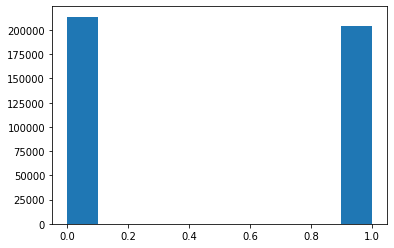

In [4]:
test_data = test_data.drop_duplicates(subset = [VIEWER_ID])
plt.hist(test_data[SAW_LOCAL_AD])

In [5]:
print(len(test_data))
test_data = pd.merge(test_data, viewer_data, how='left', on = VIEWER_ID )
print(len(test_data))

418020
418020


In [ ]:
plt.hist(test_data[WATCHED_POLITICS])

In [12]:
def check_ad_effect(df,dfname):
    print(f'{dfname} length: {len(df)} ---------')
    print(f'number watched: {len(df.loc[df[WATCHED_POLITICS]==1])}')
    print(f'number did not watch:{len(df.loc[df[WATCHED_POLITICS]==0])}')
    percent_watched = 100*len(df.loc[df[WATCHED_POLITICS]==1])/len(df)
    percent_not_watched = 100*len(df.loc[df[WATCHED_POLITICS]==0])/len(df)
    print(f'Saw Local Ad: Watched: {percent_watched} Did Not Watch: {percent_not_watched}')
    

In [13]:
saw_local_ad = test_data.loc[test_data[SAW_LOCAL_AD]==1]
no_ad = test_data.loc[test_data[SAW_LOCAL_AD]==0]
check_ad_effect(saw_local_ad, 'saw local ad')
check_ad_effect(no_ad, 'no local ad')



saw local ad length: 204325 ---------
number watched: 9354
number did not watch:194971
Saw Local Ad: Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad length: 213695 ---------
number watched: 13447
number did not watch:200248
Saw Local Ad: Watched: 6.292613304008049 Did Not Watch: 93.70738669599196


So, viewers that saw the local ad watched US Politics This Week ~1.73% less than viewers who did not see the ad. This is not expected, but may be due to the samples not being stratified across users by age, gender, tv_size, etc evenly.

# Why less viewers that saw Local Ad watched US Politics This Week

Let's first merge in viewer data, and double check that we do not lose an viewers due to not having their viewer data

In [ ]:
#df['zipcode'] = df.zipcode.astype(str)
print(saw_local_ad.dtypes)
#saw_local_ad['tv_provider'] = saw_local_ad['tv_provider'].astype('category')
#df['zipcode'] = df.zipcode.astype('category')
print(saw_local_ad['tv_provider'].dtypes)
print(saw_local_ad['tv_provider'].unique())


In [ ]:
#nans = test_data[test_data.isna().any(axis=1)]
#nans = test_data[test_data['city'].isnull()]
#print(nans)#print(len(nans))

In [ ]:
questionable = ['tv_provider', 'gender', 'age', 'city']
for col in questionable:
    nans = test_data[test_data[col].isnull()]
    print(f'{col} has {len(nans)} NaN values')
#for col in questionable:
#nans = test_data[test_data['tv_provider'].isnull()]
print(len(nans))
#plt.hist(nans['test'])
#plt.hist(nans['watched'])

178608
140296
viewer_id
10
11
date
10
11
tv_make
10
11
tv_size
10
11
uhd_capable
10
11
tv_provider
10
11
total_time_watched
10
11
watched
(array([9.53899041, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.46100959]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)
(array([9.49984319, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.50015681]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)
10
11
test
10
11
gender
10
11
age
10
11
city
10
11


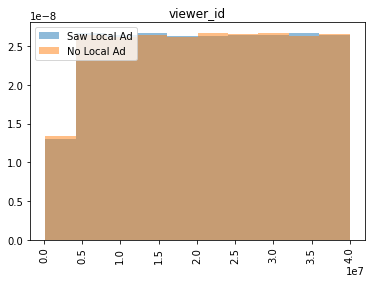

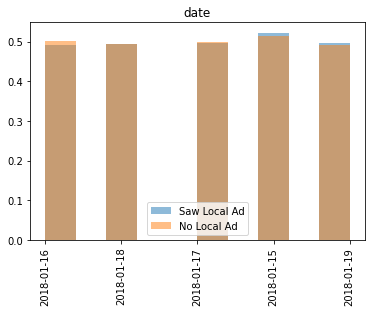

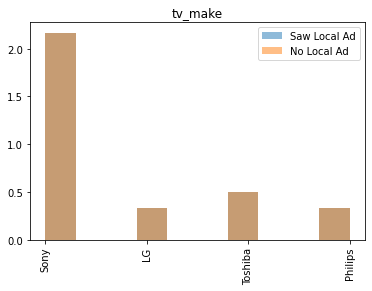

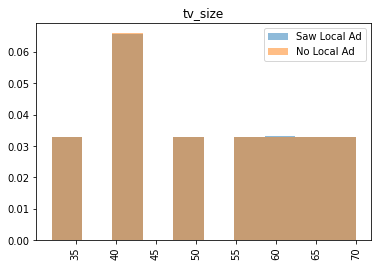

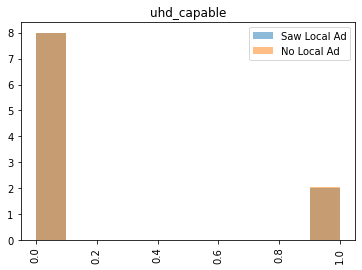

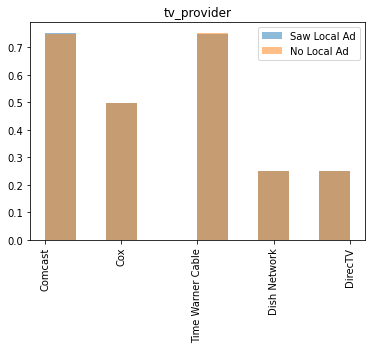

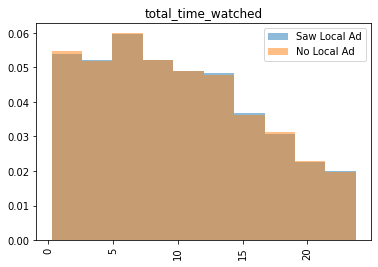

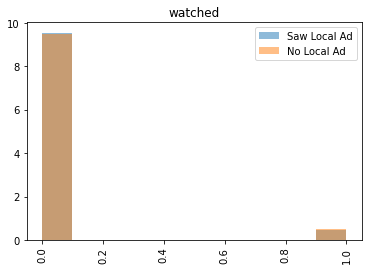

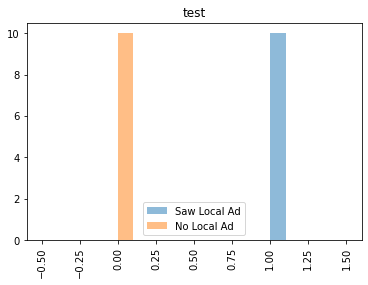

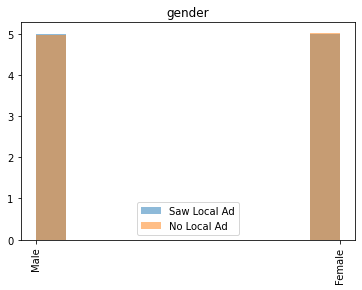

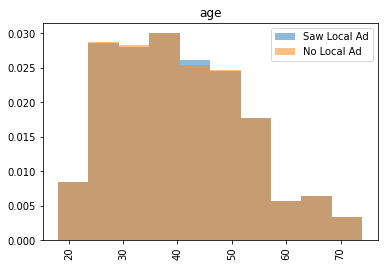

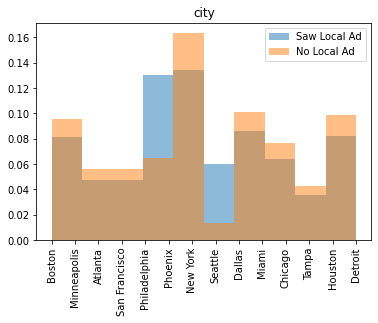

In [21]:
no_nans = test_data.dropna()
no_la = no_nans.loc[no_nans['city'] != 'Los Angeles']

saw_ad, no_ad = split_df(no_la, SAW_LOCAL_AD)
print(len(saw_ad))
print(len(no_ad))
#print('SAW AD')
#print(sorted(saw_ad['city'].unique()))
#print('NO AD')
#print(sorted(no_ad['city'].unique()))
#cities = test_data['city'].unique()
make_bar_plots(saw_ad, no_ad, 'Saw Local Ad', 'No Local Ad')

#print(no_nans['city'].unique())

In [22]:
def make_bar_plots(df1, df2, df1name, df2name):
    for col in df1.columns:
        figure = plt.figure()
        local_ad_ndarray = plt.hist(df1[col],  label = df1name, density = True, alpha = 0.5)
        no_ad_ndarray = plt.hist(df2[col],  label = df2name, density = True, alpha = 0.5)
        plt.xticks(rotation='vertical')
        plt.title(col)
        plt.legend()

In [15]:
def split_df(df, var):
    df1 = df.loc[df[var]==1]
    df2 = df.loc[df[var]==0]
    return df1, df2

In [23]:
check_ad_effect(saw_local_ad, 'saw local ad')
check_ad_effect(no_ad, 'no local ad')

saw local ad length: 204325 ---------
number watched: 9354
number did not watch:194971
Saw Local Ad: Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad length: 140296 ---------
number watched: 7017
number did not watch:133279
Saw Local Ad: Watched: 5.001568113132235 Did Not Watch: 94.99843188686776


In [27]:
cities = no_nans['city'].unique()
print(cities)
for city in cities:
    print(f'{city}-------------')
    thiscity = no_nans.loc[no_nans['city']==city]
    saw_ad, no_ad = split_df(thiscity, SAW_LOCAL_AD)
    check_ad_effect(saw_local_ad, 'saw local ad')
    check_ad_effect(no_ad, 'no local ad')

['Boston' 'San Francisco' 'Philadelphia' 'Detroit' 'Minneapolis' 'Atlanta'
 'Chicago' 'Los Angeles' 'Dallas' 'Miami' 'New York' 'Phoenix' 'Seattle'
 'Tampa' 'Houston']
Boston-------------
saw local ad length: 204325 ---------
number watched: 9354
number did not watch:194971
Saw Local Ad: Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad length: 10299 ---------
number watched: 539
number did not watch:9760
Saw Local Ad: Watched: 5.233517817263812 Did Not Watch: 94.76648218273618
San Francisco-------------
saw local ad length: 204325 ---------
number watched: 9354
number did not watch:194971
Saw Local Ad: Watched: 4.578000734124556 Did Not Watch: 95.42199926587544
no local ad length: 10203 ---------
number watched: 509
number did not watch:9694
Saw Local Ad: Watched: 4.9887288052533565 Did Not Watch: 95.01127119474664
Philadelphia-------------
saw local ad length: 204325 ---------
number watched: 9354
number did not watch:194971
Saw Local Ad: Watched: 4.578000734124